 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [150]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [151]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
csv_path = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
csv_path = pd.DataFrame()
whale_returns_df

whale_returns_df = whale_returns_df.sort_index()
#("Date", ascending=True).copy()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [152]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

# Validate no more missing values
whale_returns_df.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [153]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [154]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
csv_path = Path("Resources/algo_returns.csv")

# YOUR CODE HERE
algo_returns_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
csv_path = pd.DataFrame()
algo_returns_df

algo_returns_df = algo_returns_df.sort_index() 
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [155]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().mean() 
algo_returns_df.isnull().sum()

# Validate no more missing values
algo_returns_df.isnull().sum()





Algo 1    0
Algo 2    6
dtype: int64

In [156]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [ ]:
## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [157]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE

csv_path = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
csv_path = pd.DataFrame()
sp500_history_df

sp500_history_df = sp500_history_df.sort_index() 

#("Date", ascending=True).copy()
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [158]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes.copy()


Close    object
dtype: object

In [159]:
# Fix Data Types
# YOUR CODE HERE
#sp500_history_df = sp500_history_sorted_date_index

sp500_history_df["Close"] = sp500_history_df["Close"].replace({'\$':''}, regex = True).copy()

sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
#need to get rid of dollar signs for this line of code 
sp500_history_df.head()


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [160]:
# Calculate Daily Returns
# YOUR CODE HERE
#sp500_history_sorted_date_index_dollarsigns_gone_pct_change = sp500_history_sorted_date_index_dollarsigns_gone.copy() 

sp500_history_df= sp500_history_df.pct_change().copy() 
sp500_history_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [161]:
# Drop nulls
# YOUR CODE HERE
sp500_history_df= sp500_history_df.dropna().copy()
# Validate no more missing values
sp500_history_df.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [162]:
# Rename Column
# YOUR CODE HERE
sp500_history_df.rename(columns={'Close': 'SP500'}, inplace=True)
sp500_history_df.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [163]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
combined_df.head(30)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

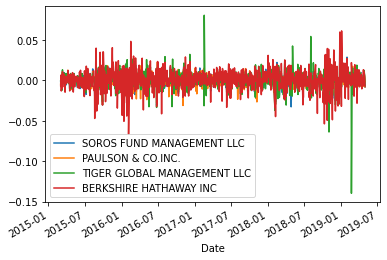

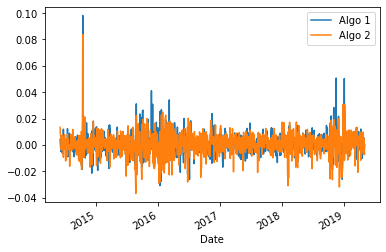

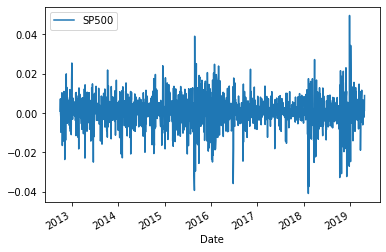

In [194]:
# Plot daily returns
# YOUR CODE HERE
whale_returns_df.plot() 
algo_returns_df.plot() 
sp500_history_df.plot() 

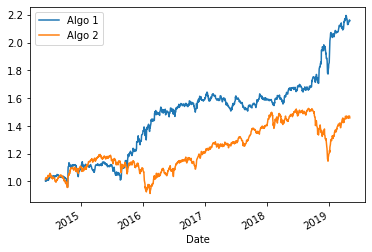

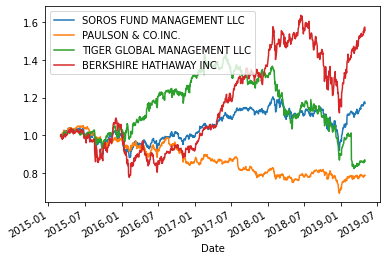

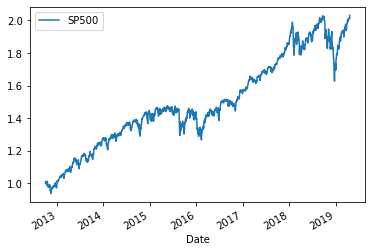

In [206]:
# Plot cumulative returns
# YOUR CODE HERE

# Use the `cumprod` function to calculate cumulative returns
cumulative_returns_algo = (1 + algo_returns_df).cumprod()
# Plot the returns of the investment
cumulative_returns_algo.plot()

cumulative_returns_whale = (1 + whale_returns_df).cumprod()
# Plot the returns of the investment
cumulative_returns_whale.plot()

cumulative_returns_sp500 = (1 + sp500_history_df).cumprod()
# Plot the returns of the investment
cumulative_returns_sp500.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

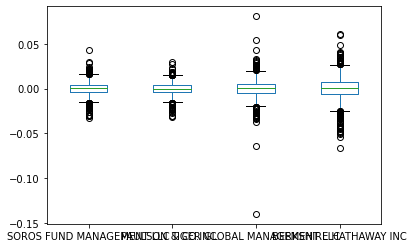

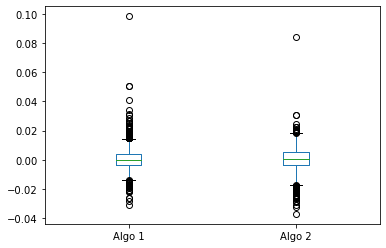

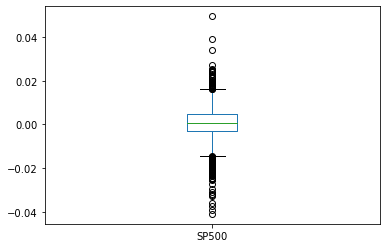

In [195]:
# Box plot to visually show risk
# YOUR CODE HERE
whale_returns_df.plot.box()
algo_returns_df.plot.box() 
sp500_history_df.plot.box() 

In [196]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HEREdaily_std = daily_returns.std()
algo_returns_df.std() 
#algo_returns_df = algo_returns_df.std() 
whale_returns_df.std() 
sp500_history_df.std() 

SP500    0.008111
dtype: float64

In [170]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [199]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_algo_std = algo_returns_df * np.sqrt(252)
annualized_algo_std.head() 

annualized_whale_std = whale_returns_df * np.sqrt(252)
annualized_whale_std.head() 

annualized_sp_std = sp500_history_df * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

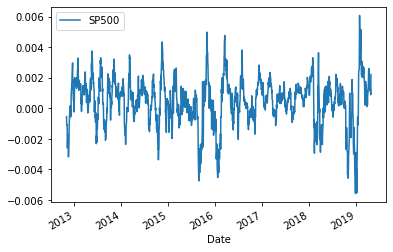

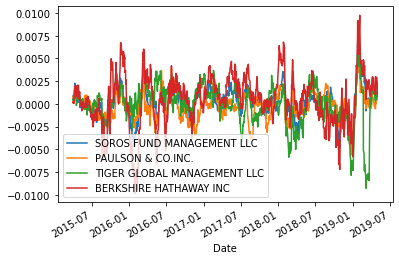

In [210]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
sp500_history_df_21 = sp500_history_df.rolling(window=21).mean()
sp500_history_df_21

whale_returns_df_21 = whale_returns_df.rolling(window=21).mean()
whale_returns_df_21

sp500_history_df_21.plot()
whale_returns_df_21.plot() 

In [211]:
# Construct a correlation table
# YOUR CODE HERE

correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [282]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE


In [283]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [284]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

In [285]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [174]:
# Read the first stock
# YOUR CODE HERE
# Reading whale returns
shop_historical_csv = Path("Resources/shop_historical.csv")
csv_path = Path("Resources/shop_historical.csv")
# YOUR CODE HERE
shop_historical_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
csv_path = pd.DataFrame()
shop_historical_df

shop_historical_df = shop_historical_df.sort_index()
#("Date", ascending=True).copy()
shop_historical_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [175]:
# Read the second stock
# YOUR CODE HERE
otex_historical_csv = Path("Resources/otex_historical.csv")
csv_path = Path("Resources/otex_historical.csv")
# YOUR CODE HERE
otex_historical_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
csv_path = pd.DataFrame()
otex_historical_df

otex_historical_df = otex_historical_df.sort_index()
#("Date", ascending=True).copy()
otex_historical_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [189]:
# Read the third stock
# YOUR CODE HERE
l_historical_csv = Path("Resources/l_historical.csv")
csv_path = Path("Resources/l_historical.csv")
# YOUR CODE HERE
l_historical_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
csv_path = pd.DataFrame()
l_historical_df

l_historical_df = l_historical_df.sort_index()
#("Date", ascending=True).copy()
l_historical_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [190]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combined_stocks_df = pd.concat([l_historical_df, otex_historical_df, shop_historical_df], axis="columns", join="inner")
combined_stocks_df.head(30)

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51
2018-01-09,L,57.37,OTEX,42.13,SHOP,137.94
2018-01-10,L,57.09,OTEX,41.99,SHOP,139.29
2018-01-11,L,56.78,OTEX,42.29,SHOP,139.14
2018-01-12,L,56.97,OTEX,42.17,SHOP,140.76


In [191]:
# Reset the index
# YOUR CODE HERE
combined_stocks_df = combined_stocks_df.reset_index() # opposite of set_index

In [193]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
#combined_stocks_df = combined_stocks_df.pivot_table(index="Date", columns="Close")
#combined_stocks_df.head()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [292]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [293]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [294]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [295]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [296]:
# Risk
# YOUR CODE HERE

In [297]:
# Rolling
# YOUR CODE HERE

In [298]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [299]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [300]:
# Create a correlation analysis
# YOUR CODE HERE

In [301]:
# Beta
# YOUR CODE HERE